## Preprocessing

In [1]:
# Import our dependencies

import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

import matplotlib.pyplot as plt
import pandas as pd


In [2]:
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
cleaned_application_df = application_df.drop(['EIN', 'NAME','ORGANIZATION'], axis=1)  #,  'USE_CASE', 'AFFILIATION','ORGANIZATION'], axis=1)
cleaned_application_df.tail(10)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
34289,T3,Independent,C1000,Preservation,1,25000-99999,N,20197,1
34290,T4,CompanySponsored,C3000,Preservation,1,1-9999,N,5000,0
34291,T4,CompanySponsored,C3000,ProductDev,1,0,N,5000,0
34292,T4,CompanySponsored,C3000,ProductDev,1,0,N,5000,0
34293,T3,CompanySponsored,C1000,Preservation,1,0,N,5000,1
34294,T4,Independent,C1000,ProductDev,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,1,0,N,5000,1
34298,T3,Independent,C1000,Preservation,1,1M-5M,N,36500179,0


In [4]:
# Determine the number of unique values in each column.

app_df_unique_vals = cleaned_application_df.nunique()

print(app_df_unique_vals)

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [5]:
# Look at APPLICATION_TYPE value counts for binning

#cleaned_application_df
#["APPLICATION_TYPE"]

app_type_value_counts = cleaned_application_df["APPLICATION_TYPE"].value_counts()

app_type_value_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`

cutoff_ref = 500 #assuming that the "156" ... is some sort of "new product" ... that the LoB may want to compare the progress of ... 

comparative_values_listed = app_type_value_counts

application_types_to_replace = comparative_values_listed[comparative_values_listed <= cutoff_ref].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    cleaned_application_df['APPLICATION_TYPE'] = cleaned_application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
cut_off_SanChk = cleaned_application_df['APPLICATION_TYPE'].value_counts()

cut_off_SanChk

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning

classification_type_value_counts = cleaned_application_df['CLASSIFICATION'].value_counts()

classification_type_value_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1

classification_type_filtered_counts = classification_type_value_counts[classification_type_value_counts > 1]

# = [i for i in classification_type_value_counts if classification_type_value_counts > 1] #future fix ... using Chat GPT to help debug ... Same code as above is solution ...  
# = classification_type_value_counts.loc[lambda x: (x > 1)] ## Adds some "familiarity" ... to what lambda does as an alternate here ... 

print(classification_type_filtered_counts)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64


In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`

cutoff_ref_2 = 1000 #150 Will change it to match what the assignment had as an example ... 

comparative_values_listed = classification_type_value_counts

classifications_to_replace= comparative_values_listed[comparative_values_listed <= cutoff_ref_2].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    cleaned_application_df['CLASSIFICATION'] = cleaned_application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
cut_off_2_SanChk = cleaned_application_df['CLASSIFICATION'].value_counts()

cut_off_2_SanChk

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
cleaned_application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   STATUS                  34299 non-null  int64 
 5   INCOME_AMT              34299 non-null  object
 6   SPECIAL_CONSIDERATIONS  34299 non-null  object
 7   ASK_AMT                 34299 non-null  int64 
 8   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 2.4+ MB


In [11]:
# Convert categorical data to numeric with `pd.get_dummies`

cat_col_names_fetched = [col_name for col_name, dtype in cleaned_application_df.dtypes.items() if dtype != 'int64']
#print(cat_col_names_fetched)

#[col_name for col_name in cleaned_application_df.columns if cleaned_application_df.columns.dtype == type('int64') ]   # != "int64" ]

#Chat GPT answer below:
# Use a list comprehension to get column names where the datatype is not "int64"
#non_int64_columns = [col for col, dtype in df.dtypes.items() if dtype != 'int64']

cat_transformed_application_df = pd.get_dummies(cleaned_application_df, columns=cat_col_names_fetched)

print(cat_col_names_fetched)
print("++++++")
#cleaned_application_df.head(4)

cat_transformed_application_df.head(4)

['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS']
++++++


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [12]:
# Split our preprocessed data into our features and target arrays

target_data_col = "IS_SUCCESSFUL" #"the rest" ... becomes the features ... 
#NOTE ... this is what "y_pred" ... eventually is giving us proposals (predictions) for ... 

X_feature_data = cat_transformed_application_df.drop(target_data_col, axis=1)
y_target_data = cat_transformed_application_df[target_data_col]

# Split the preprocessed data into a training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X_feature_data, y_target_data, test_size=0.2, random_state=27)

print(y_test)
print("-----")
print(len(y_target_data))
print(len(y_test))
print(len(y_train))


27646    1
31610    0
32109    0
33466    1
30030    1
        ..
32516    1
8049     0
18725    1
1045     0
19358    0
Name: IS_SUCCESSFUL, Length: 6860, dtype: int64
-----
34299
6860
27439


In [13]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [14]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

X_features_datapoints_count = X_train_scaled.shape[1]    #X_feature_data[0])  #X_feature_data[1])  #X_train_scaled.shape[1]
nodes_layer1 = 95  #6th ... going up to 90  ...  #5th is at 7 ... 4th from 20 ... 1st from  80
nodes_layer2 = 45 #6th ... going up to 40  ...  #5th is at 12 ... 4th from 15 ... 1st from 30
dropout_rate1 = 0.5
nodes_layer3 = 35 #6th ... starting at 25
nodes_layer4 = 17 #6th ... starting at 12
nodes_layer5 = 8 #6th ... starting at 12
node_outputlayer = 1
####
print(X_features_datapoints_count)  #6th at 36 ...  #5th at 30 ...  4th at 56 ... #4th back to 44 ...  #2nd .... Shape of inputs reduced from 44 to 33 ... 


39


In [15]:
#Define the model and apply the layers to check on it's structure ...
####

# Create the Keras Sequential model
nn_model2 = tf.keras.models.Sequential()

# # Add our first Dense/hidden layer, including the input layer
nn_model2.add(tf.keras.layers.Dense(units=nodes_layer1, activation="relu",input_dim=X_features_datapoints_count))

# Second hidden layer
nn_model2.add(tf.keras.layers.Dense(units=nodes_layer2, activation="relu"))

# 3rd hidden layer
nn_model2.add(tf.keras.layers.Dense(units=nodes_layer3, activation="tanh"))

#see url => https://keras.io/api/layers/regularization_layers/dropout/
#Dropout Layer adding regularization step in process to help prevent overfitting ... 
#nn_model2.add(tf.keras.layers.Dropout(dropout_rate1))

##REMOVED dropout layer .

# 4th hidden layer
nn_model2.add(tf.keras.layers.Dense(units=nodes_layer4, activation="tanh"))

# 5th hidden layer
nn_model2.add(tf.keras.layers.Dense(units=nodes_layer5, activation="relu"))

# # Add the output layer that uses a probability activation function
nn_model2.add(tf.keras.layers.Dense(units=node_outputlayer, activation="sigmoid"))


In [16]:
# Check the structure of the model
nn_model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 95)                3800      
                                                                 
 dense_1 (Dense)             (None, 45)                4320      
                                                                 
 dense_2 (Dense)             (None, 35)                1610      
                                                                 
 dense_3 (Dense)             (None, 17)                612       
                                                                 
 dense_4 (Dense)             (None, 8)                 144       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 10495 (41.00 KB)
Trainable params: 10495 (

In [17]:
# Compile the model
nn_model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

#Enable early stopping as per url => https://keras.io/api/callbacks/early_stopping/#earlystopping-class

early_stop_start_epoch = 30
early_stop_patience_epoch = 7

early_stopping_min_loss = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=early_stop_patience_epoch,
    verbose=1,
    mode="auto",   #"min",     #"auto", #Using the advice of the url ... 
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=early_stop_start_epoch,
)

#below via Chat GPT to answer the Module ask of => # Create a callback that saves the model's weights every 5 epochs

from tensorflow.keras.callbacks import ModelCheckpoint

# Assuming you have already defined and compiled your nn_model2

# Define the callback
checkpoint_filepath = 'model_weights_chk_every5.keras' #changed from ".h5"
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    save_freq='epoch',  # Save weights every epoch
    period=5,  # Save weights every 5 epochs
    verbose=1
)

## Train the model and include the callback
#history = nn_model2.fit(
#    x_train, y_train,
#    epochs=num_epochs,
#    validation_data=(x_val, y_val),
#    callbacks=[model_checkpoint_callback]
#)

In [18]:
# Train the model
train_epochs = 75

fit_model2 = nn_model2.fit(X_train_scaled, y_train,
    epochs=train_epochs,
    validation_split=0.1,
    callbacks=[model_checkpoint_callback, early_stopping_min_loss] #early_stopping_min_loss]
)

fit_model2

Epoch 1/75
772/772 [==============================] - 4s 3ms/step - loss: 0.5815 - accuracy: 0.7151 - val_loss: 0.5523 - val_accuracy: 0.7387
Epoch 2/75
772/772 [==============================] - 3s 4ms/step - loss: 0.5663 - accuracy: 0.7229 - val_loss: 0.5474 - val_accuracy: 0.7391
Epoch 3/75
772/772 [==============================] - 3s 4ms/step - loss: 0.5640 - accuracy: 0.7238 - val_loss: 0.5498 - val_accuracy: 0.7343
Epoch 4/75
772/772 [==============================] - 3s 4ms/step - loss: 0.5630 - accuracy: 0.7253 - val_loss: 0.5470 - val_accuracy: 0.7380
Epoch 5/75
772/772 [==============================] - ETA: 0s - loss: 0.5621 - accuracy: 0.7248
Epoch 5: saving model to model_weights_chk_every5.keras
772/772 [==============================] - 2s 3ms/step - loss: 0.5621 - accuracy: 0.7248 - val_loss: 0.5483 - val_accuracy: 0.7383
Epoch 6/75
772/772 [==============================] - 2s 3ms/step - loss: 0.5615 - accuracy: 0.7272 - val_loss: 0.5475 - val_accuracy: 0.7376
Epoch 7

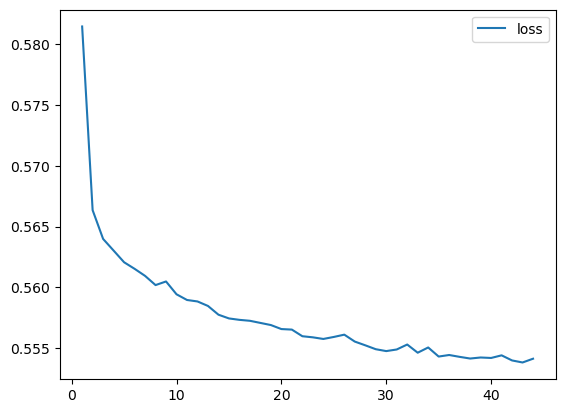

In [19]:
# Create a DataFrame containing training history
nn_model2_historydf = pd.DataFrame(fit_model2.history)

# Increase the index by 1 to match the number of epochs
nn_model2_historydf.index += 1

# Plot the loss
nn_model2_historydf.plot(y="loss")

plt.show()

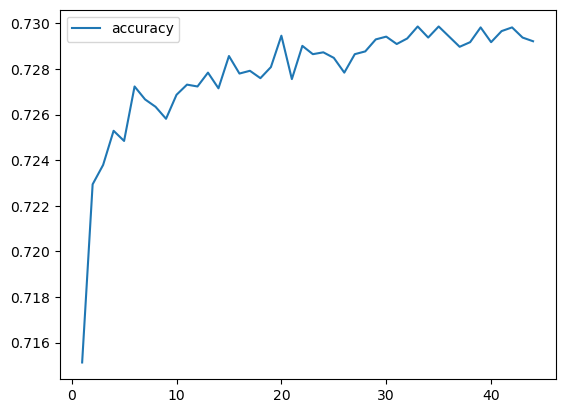

In [20]:
# Plot the accuracy
nn_model2_historydf.plot(y="accuracy")

plt.show()

In [21]:
# Evaluate the model using the test data
model2_loss, model2_accuracy = nn_model2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model2_loss}, Accuracy: {model2_accuracy}")

215/215 - 0s - loss: 0.5629 - accuracy: 0.7278 - 464ms/epoch - 2ms/step
Loss: 0.5629329681396484, Accuracy: 0.7278425693511963


In [22]:
# Export our model to HDF5 file
nn_model2.save("AlphabetSoupCharity-optimized-nn_model_2.h5")

c:\Users\Aolda\anaconda3\envs\dev\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
#Trying out warning response on ".h5" being legacy ... 

nn_model2.save("AlphabetSoupCharity-optimized-nn_model_2.keras")

In [24]:
#Can't seem to get the model to optimize to around 75 % ... I have been able to insert a lot of new functionality via the Keras docs + Chat GPT that I'll align as future fixes ... 

#ADDING BACK K_TUNER CODE for marking needs .. 

In [25]:
#Note this would be right after the "X_Scaled" data set is created ...

print(X_train_scaled.shape[1])

39


In [31]:
#Leveraging prior activity -> # Create a method that creates a new Sequential model with hyperparameter options

from tensorflow.keras.callbacks import ModelCheckpoint

##
Ktuner_input_dim = X_train_scaled.shape[1]
Ktuner_max_units = nodes_layer1 #40 ... going with 95 from above ... 
##

def create_model(hp):
    nn_model_ktuner = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model_ktuner.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=Ktuner_max_units,
        step=2), activation=activation, input_dim=Ktuner_input_dim))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model_ktuner.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=Ktuner_max_units,
            step=2),
            activation=activation))
    
    #Add Output layer
    nn_model_ktuner.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model_ktuner.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    early_stop_start_epoch = 30
    early_stop_patience_epoch = 7

    early_stopping_min_loss = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=early_stop_patience_epoch,
    verbose=1,
    mode="auto",   #"min",     #"auto", #Using the advice of the url ... 
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=early_stop_start_epoch,
    )


    #below via Chat GPT to answer the Module ask of => # Create a callback that saves the model's weights every 5 epochs

    #from tensorflow.keras.callbacks import ModelCheckpoint

    # Assuming you have already defined and compiled your nn_model2

    # Define the callback
    checkpoint_filepath = 'model_weights_chk_every5.keras' #changed from ".h5"
    model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    save_freq='epoch',  # Save weights every epoch
    period=5,  # Save weights every 5 epochs
    verbose=1
    )

    return nn_model_ktuner

In [32]:
# Import the kerastuner library
import keras_tuner as kt

tuner_epochs = 30

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=tuner_epochs,
    hyperband_iterations=2    #Leaving at 2 ... 
    )

#hyperband_iterations via url => https://keras.io/api/keras_tuner/tuners/hyperband/#:~:text=hyperband_iterations%3A%20Integer%2C%20at%20least%201%2C%20the%20number%20of,a%20value%20as%20is%20within%20your%20resource%20budget.
##
# => hyperband_iterations: Integer, at least 1, the number of times to iterate over the full Hyperband algorithm. One iteration will run approximately max_epochs * (math.log(max_epochs, factor) ** 2) cumulative epochs across all trials. It is recommended to set this to as high a value as is within your resource budget. Defaults to 1.

Reloading Tuner from .\untitled_project\tuner0.json


In [33]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=tuner_epochs,validation_data=(X_test_scaled,y_test))

In [34]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values


#1st run with val_loss stopper ... speed increased MASSIVELY for the epoch tests ... 
##
#1st result => {'activation': 'tanh',
 #'first_units': 7,
 #'num_layers': 2,
 #'units_0': 9,
 #'units_1': 7,
 #'units_2': 1,
 #'units_3': 9,
 #'units_4': 1,
 #'units_5': 3,
 #'tuner/epochs': 25,
 #'tuner/initial_epoch': 9,
 #'tuner/bracket': 2,
 #'tuner/round': 2,
 #'tuner/trial_id': '0039'}

{'activation': 'tanh',
 'first_units': 7,
 'num_layers': 2,
 'units_0': 9,
 'units_1': 7,
 'units_2': 1,
 'units_3': 9,
 'units_4': 1,
 'units_5': 3,
 'tuner/epochs': 25,
 'tuner/initial_epoch': 9,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0039'}

In [37]:
# Evaluate the top 3 models against the test dataset ... 

top_model = tuner.get_best_models(3)
for model in top_model:
     tuner_model_loss, tuner_model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
     print(f"Loss: {tuner_model_loss}, Accuracy: {tuner_model_accuracy}")

#Unable to debug the error will fix it in the future ... 

ValueError: Received incompatible tensor with shape (36, 7) when attempting to restore variable with shape (39, 7) and name dense/kernel:0.

In [36]:
#Failed for some reason on my different ENV



# Evaluate best model against full test data
#best_model = tuner.get_best_models(1)[0]
#model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
#print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


##1st Run Best Model ... results...
## Still not good enough (if 75% is bare minimum) but ...
#
#
#